# Diamond Price Prediction


## Introduction About the Data:

**The dataset** The goal is to predict price of given diamond (Regression Analysis).

There are 10 Independent variable (including ID):

* Carat:  Carat weight of the cubic zirconia.

* Cut: 	 Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

* Color:    Colour of the cubic zirconia.With D being the best and J the worst.

* Clarity:  cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3.

* Depth:  The Height of a cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

* Table:	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

* Price:	 the Price of the cubic zirconia.
* X:	 Length of the cubic zirconia in mm.
* Y:	 Width of the cubic zirconia in mm.
* Z:	 Height of the cubic zirconia in mm.



In [1]:
import pandas as pd

In [2]:
# Data Ingestion Step
df=pd.read_csv(r"D:\Yash\projects\DiamondPricePrediction\notebook\data\cubic_zirconia.csv")
df.head()


,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

some missing values present in depth variable


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [5]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df=df.drop(df.iloc[:,:1],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [7]:
df.duplicated().sum()

34

There are 34 duplicate records in the dataset

In [8]:
#makeing dataset of those record which do not contain duplicate records
df=df[~df.duplicated()]

In [9]:
df.duplicated().sum()

0

In [10]:
""" Segerate numerical and categorical columns"""
"""1-way of doing this
numerical_column=df.drop(labels=['cut','color','clarity','price'],axis=1)
categorical_columns=df[['cut','color','clarity']]"""

"""Another-way"""
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns",numerical_columns)
print("Categorical columns",categorical_columns)

Numerical columns Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical columns Index(['cut', 'color', 'clarity'], dtype='object')


In [11]:
df[categorical_columns].describe()

,cut,color,clarity
count,26933,26933,26933
unique,5,7,8
top,Ideal,G,SI1
freq,10805,5653,6565


In [12]:
df['cut'].value_counts()

cut
Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: count, dtype: int64

In [13]:
df['color'].value_counts()

color
G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: count, dtype: int64

In [14]:
df['clarity'].value_counts()

clarity
SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

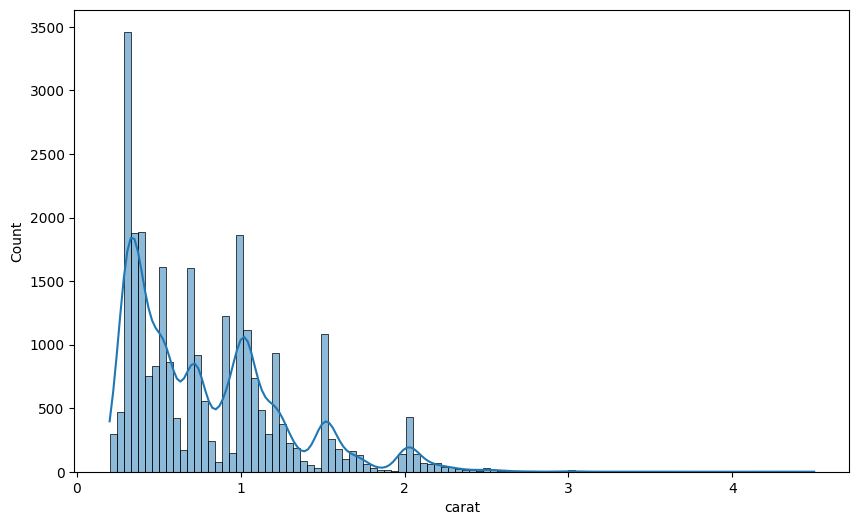

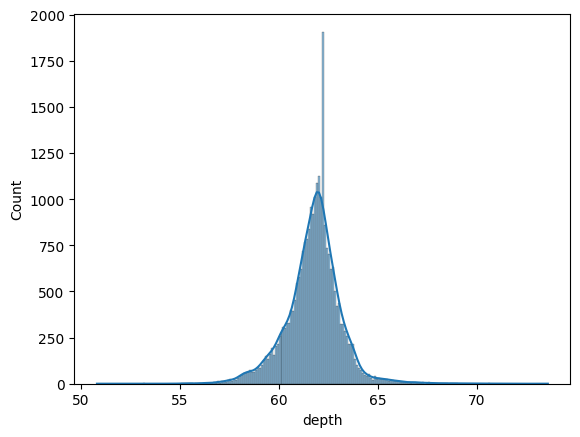

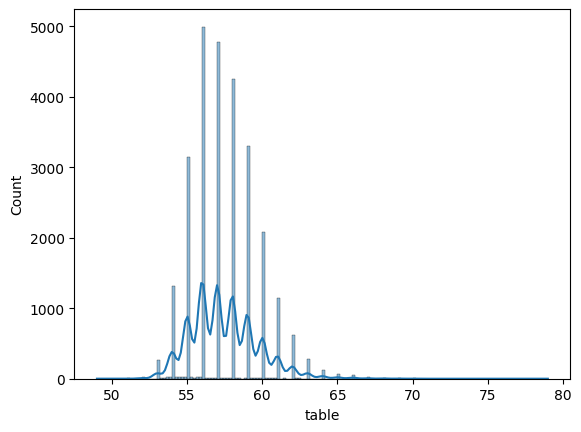

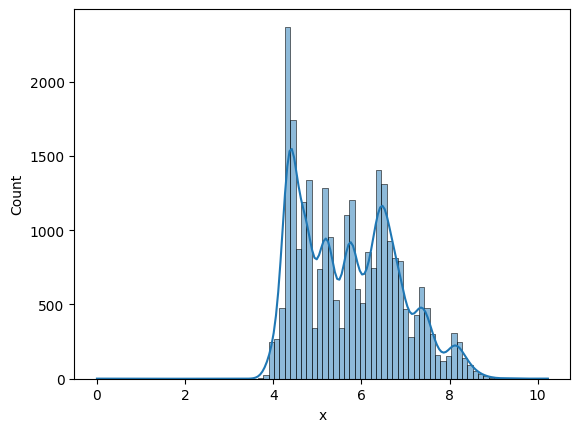

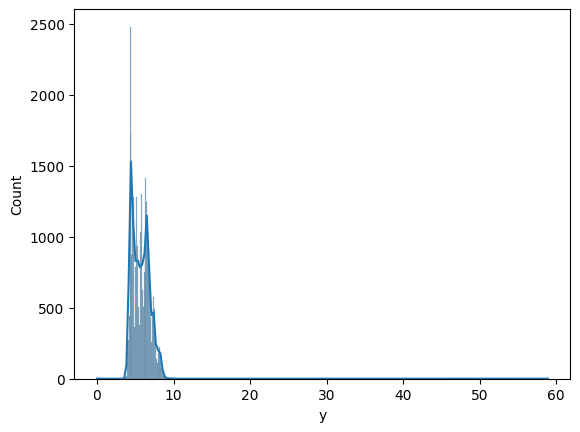

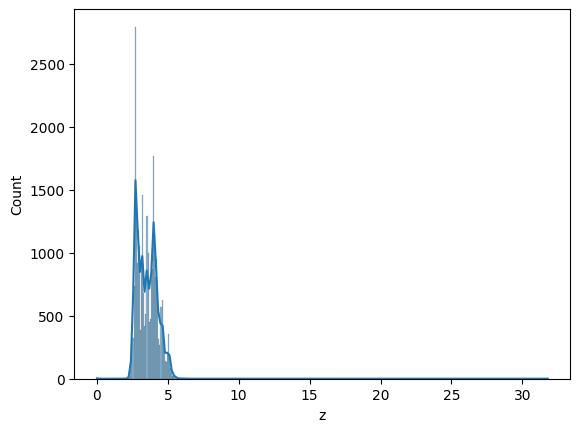

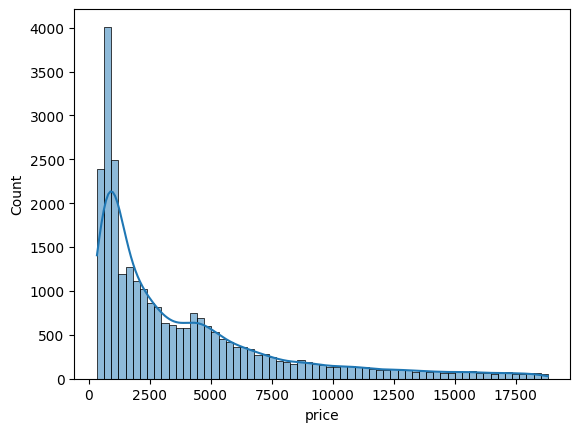

In [16]:
"""Plotting numeriacl Features"""
plt.figure(figsize=(10,6))
x=0

for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print("\n")
    plt.show()

<Figure size 800x600 with 0 Axes>

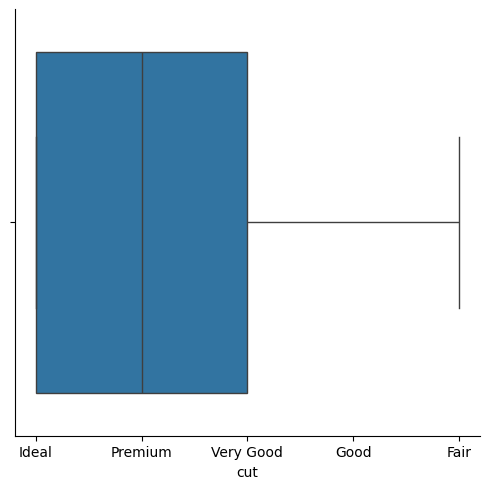

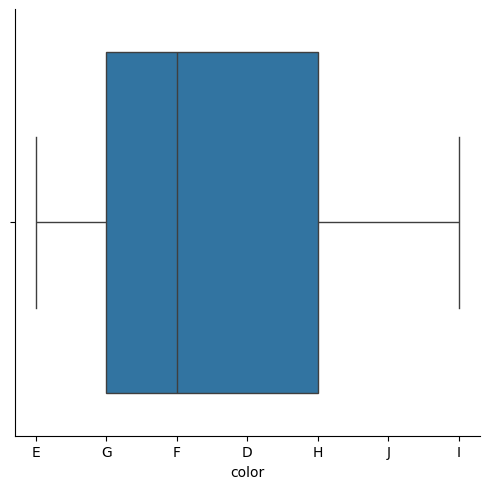

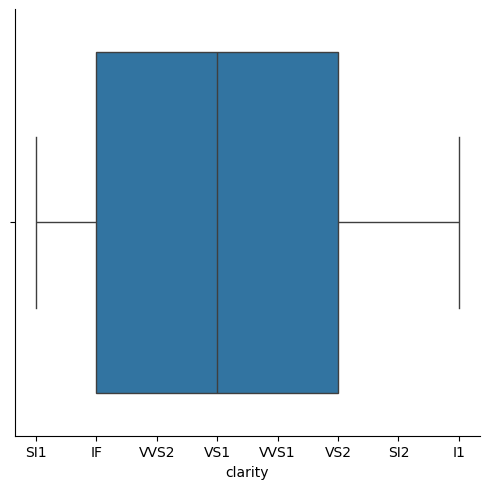

In [17]:
"""Plotting Categorical fearutes"""
plt.figure(figsize=(8,6))

for i in categorical_columns:
    sns.catplot(data=df,x=i,kind='box')
    print("\n")
    plt.show()

<Axes: >

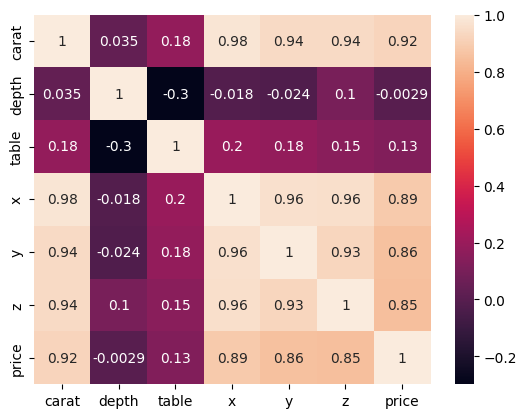

In [18]:
sns.heatmap(df[numerical_columns].corr(),annot=True)

In [19]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [20]:
cut_map={'Fair':1, 'Good':2, 'Very Good':3,'Premium':4,'Ideal':5}

In [21]:
df['clarity'].unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

In [22]:
clarity_map={'I1':1,'SI2':2,"SI1":3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

In [23]:
df['color'].unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

In [24]:
color_map={'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}

In [25]:
df['cut']=df['cut'].map(cut_map)
df['clarity']=df['clarity'].map(clarity_map)
df['color']=df['color'].map(color_map)

In [26]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,5,2,3,62.1,58.0,4.27,4.29,2.66,499
1,0.33,4,4,8,60.8,58.0,4.42,4.46,2.70,984
2,0.90,3,2,6,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,5,3,5,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,5,3,7,60.4,59.0,4.35,4.43,2.65,779
